# Práctica 2: Aprendizaje automático

El objetivo de esta práctica es aplicar los distintos algoritmos de aprendizaje automático disponibles en la scikit-learn [sklearn](https://scikit-learn.org/stable/) sobre varios conjuntos de datos y aprender a interpretar los resultados obtenidos. La práctica consta de __2 notebooks__ que se entregarán en las tareas de entrega habilitadas en el Campus Virtual. Este notebook corresponde al apartado de __clasificación__.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

__Número de grupo: N__

__Nombres de los estudiantes: Daniel Casquero Palencia y Luis Orofino Álvarez__

# Apartado 2: Regresión

En este notebook trabajaremos con un conjunto de datos tomado del repositorio de la Universidad de California Irvine. En concreto, se trata de un conjunto de datos sobre distintos vinos del norte de Portugal (vinho verde)  que puedes encontrar [aquí](https://archive.ics.uci.edu/ml/datasets/wine+quality).

El objetivo es modelar la calidad del vino (con un valor de 0 a 10) en base a variables que reflejan sus propiedades físicas y químicas. En concreto, las propiedades son las siguientes:
- fixed acidity
- volatile acidity
- citric acid
- residual sugar
- chlorides
- free sulfur dioxide
- total sulfur dioxide
- density
- pH
- sulphates
- alcohol

De cara a la memoria que vas a realizar puedes investigar sobre estas propiedades para explicar mejor qué miden y cómo afectan al vino.

La calidad del vino es una variable que toma valores entre 0 y 10.

Para modelar la relación entre la calidad del vino y sus propiedades usaremos una red neuronal.

## 1) Descripción de los datos

Carga el fichero de datos `calidad_vinos.csv` en un dataframe.

Describe el conjunto de datos e identifica aquella variable que tiene unos valores extremos más acusados con respecto a la media, y aquella que está más concentrada en torno a la media. Reflexiona sobre la posible influencia de estas variables a la hora de entrenar el perceptrón multicapa.

Estudia la distribución de la calidad del vino en el conjunto de datos.

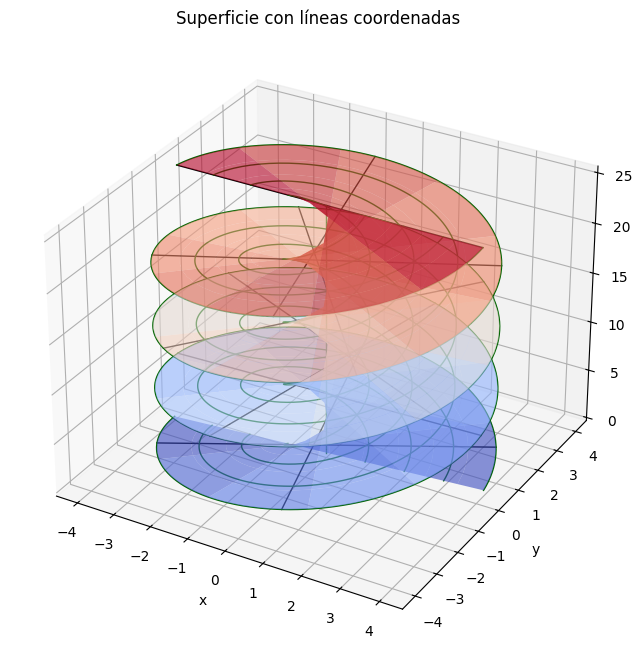

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Crear malla
u = np.linspace(0.1, 4 * np.pi, 100)
v = np.linspace(-4, 4, 50)
U, V = np.meshgrid(u, v)

# Superficie
X = V * np.cos(U)
Y = V * np.sin(U)
Z = 2 * U

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Pintar superficie
ax.plot_surface(X, Y, Z, alpha=0.6, cmap='coolwarm', rstride=5, cstride=5)

# Líneas coordenadas: u fijo (rectas radiales)
for uf in np.linspace(0.5, 4 * np.pi, 10):
    v_line = np.linspace(-4, 4, 100)
    x = v_line * np.cos(uf)
    y = v_line * np.sin(uf)
    z = 2 * uf * np.ones_like(v_line)
    ax.plot(x, y, z, color='black', linewidth=1)

# Líneas coordenadas: v fijo (hélices)
for vf in np.linspace(-4, 4, 9):
    u_line = np.linspace(0.1, 4 * np.pi, 300)
    x = vf * np.cos(u_line)
    y = vf * np.sin(u_line)
    z = 2 * u_line
    ax.plot(x, y, z, color='darkgreen', linewidth=1)

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.title("Superficie con líneas coordenadas")
plt.show()


In [1]:
import pandas as pd 

df = pd.read_csv("calidad_vinos.csv")
#creamos el dataframe
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [2]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [3]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


Todas las variables son de tipo float (valores continuos) salvo la calidad, que se mide con un entero.

La variable **total sulfur dioxide** es la que tiene valores más acusados respecto la media, es decir, mayor desviación típica (32.895). También cabe destacar **residual sugar** ya que el valor máximo (15.5) es mucho mayor que la media (2.54), lo que indica que algunos vinos tienen un contenido de azúcar residual muy alto, así como **free sulfur dioxide**, que tiene también una desviación típica alta.

Las variables con desviación típica alta pueden causar que el perceptrón multicapa tenga dificultades para aprender correctamente si no se normalizan. Puede que se les de una importancia mayor a la que tienen y que sus datos dominen sobre el resto. Por eso es tan importante la normalización que haremos más tarde.

Por otro lado,**density** es la que menos desviación típica tiene (0.001), con mucha diferencia. A su vez, **pH** tiene una desviación estándar pequeña (0.15), lo que indica que los valores están bien concentrados alrededor de 3.3.

Estas variables pueden confundir al perceptrón multicapa si no se han normalizado correctamente, pues, a priori, puede parecer que apenas tienen influencia sobre los datos de salida. Pero eso se puede deber a que están muy concentradas en torno a la media.

En resumen, unos datos no normalizados afectarían al aprendizaje del perceptrón multicapa, haciendo que dominen los datos con mayor _std_ y que apenas se tengan en cuenta datos como _density_ o _pH_.

In [4]:
import matplotlib.pyplot as plt

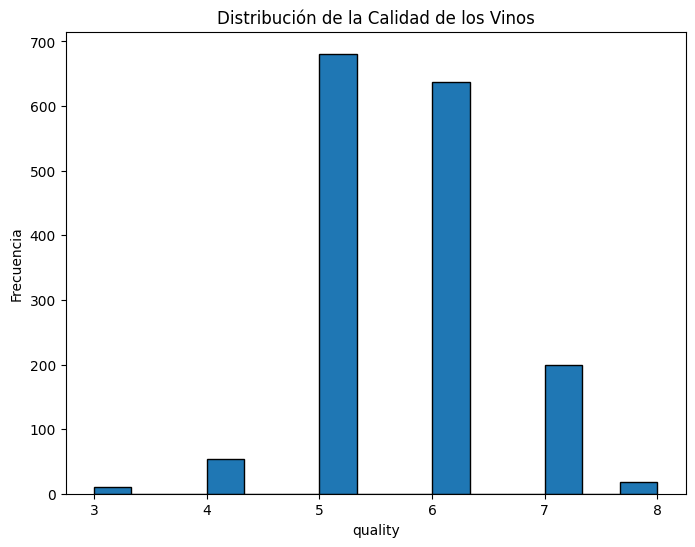

In [5]:
plt.figure(figsize=(8, 6))
plt.hist(df['quality'], bins=15, edgecolor='black')
plt.title('Distribución de la Calidad de los Vinos')
plt.xlabel('quality')
plt.ylabel('Frecuencia')
plt.show()

Vemos que la mayoría de vinos tienen un 5 o un 6 de nota de **quality**. El siguiente dato más común, ya con gran diferencia de estos, es 7. El resto de calificaciones (entre 3 y 8) apenas se dan en nuestro conjunto de vinos. Cabe recalcar que ninguno tiene menos de 3 ni más de 8.

## 2) Selección de variables

Calcula los coeficientes de correlación de Pearson entre la variable de salida y el resto de variables. Crea un nuevo dataframe que contenga la calidad y, selecciona las variables que estén más correlacionadas con ella (estableciendo para ello un valor umbral que consideres adecuado).

In [8]:
df.corr()['quality'].drop('quality')

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
Name: quality, dtype: float64

Observamos que la variable más correlacionada con la calidad del vino es el alcohol (más alcohol nos lleva a más calidad del vino pues el coeficiente es positivo). Hay más variables que influyen de manera importante en la calidad final del vino como _volatile acidity_, _citric acid_ o _sulphates_. Sin embargo, encontramos variables con apenas influencia en la calidad como _free sulfur dioxide_ y _ph_.
Para diferenciar en nuestra red neuronal estas últimas con las que tienen alguna influencia, aunque no sea muy grande, establecemos el límite de correlación en 0,15 (en valor absoluto). Desechamos las variables cuyo coeficiente de correlación es menor, sin incluirlas en nuestro nuevo dataframe.

In [9]:
df2 = df[['volatile acidity','citric acid','total sulfur dioxide','density','sulphates','alcohol','quality']]
df2

,volatile acidity,citric acid,total sulfur dioxide,density,sulphates,alcohol,quality
0,0.700,0.00,34.0,0.99780,0.56,9.4,5
1,0.880,0.00,67.0,0.99680,0.68,9.8,5
2,0.760,0.04,54.0,0.99700,0.65,9.8,5
3,0.280,0.56,60.0,0.99800,0.58,9.8,6
4,0.700,0.00,34.0,0.99780,0.56,9.4,5
...,...,...,...,...,...,...,...
1594,0.600,0.08,44.0,0.99490,0.58,10.5,5
1595,0.550,0.10,51.0,0.99512,0.76,11.2,6
1596,0.510,0.13,40.0,0.99574,0.75,11.0,6
1597,0.645,0.12,44.0,0.99547,0.71,10.2,5


## 3) Normalización

Decide si debes o no normalizar los datos de entrada y/o de salida. En caso afirmativo elige razonadamente entre escalarlos o estandarizarlos.


In [41]:
df2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000
alcohol,1599.0,10.422983,1.065668,8.40000,9.5000,10.20000,11.100000,14.90000
quality,1599.0,5.636023,0.807569,3.00000,5.0000,6.00000,6.000000,8.00000


Observando la tabla nos damos cuenta de que la mayoría de variables tienen casi todos sus valores entre 0 y 1. Sin embargo, _total sulfur dioxide_ y _alcohol_ tienen escalas muy distintas, con la mayoría de sus valores en los rangos 20-60 y 9.5-11 respectivamente. Esta gran diferencia podría llevar a que las variables con valores más bajos no se tengan en cuenta en nuestro perceptrón multicapa. Por lo que resulta necesario normalizar los datos.



In [11]:
from sklearn.preprocessing import StandardScaler
X = df2.drop(columns=['quality'])
y = df2['quality']  

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) 

df_scaled = pd.DataFrame(X_scaled, columns=X.columns)
df_scaled['quality'] = y

df_scaled.head()

,volatile acidity,citric acid,total sulfur dioxide,density,sulphates,alcohol,quality
0,0.961877,-1.391472,-0.379133,0.558274,-0.579207,-0.960246,5
1,1.967442,-1.391472,0.624363,0.028261,0.128950,-0.584777,5
2,1.297065,-1.186070,0.229047,0.134264,-0.048089,-0.584777,5
3,-1.384443,1.484154,0.411500,0.664277,-0.461180,-0.584777,6
4,0.961877,-1.391472,-0.379133,0.558274,-0.579207,-0.960246,5


## 4) Primer modelo: kNN

Antes de pasar a crear las redes neuronales, vamos crear unos primeros modelos más sencillos para comparar. Para ello:

- Crea varios modelos kNN con distintos valores de k (de 2 a 20 vecinos)
- Calcula el MSE de cada uno de ellos, utilizando validación cruzada, para elegir el mejor valor de k

Para elegirlo, pinta el gráfico de MSE para los distintos valores de k.

In [12]:
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,mean_squared_error


In [13]:
# Separar variables de entrada y salida
X = df_scaled.drop(columns=['quality'])
y = df_scaled['quality']

# Dividir en conjunto de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Rango de valores de k a probar
k_values = range(2, 21)
mse_mean = []
mse_std = []

# Probar distintos valores de k usando validación cruzada
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)  # Usamos KNeighborsRegressor para regresión
    scores = cross_validate(knn, X_train, y_train, cv=5, scoring='neg_mean_squared_error')  # Usar 'neg_mean_squared_error' para MSE
    mse_mean.append(-np.mean(scores['test_score']))  # Convertimos a valor positivo, ya que es negativo por la forma en que se calcula
    mse_std.append(np.std(scores['test_score']))

Ahora pintamos un gráfico con los valores de MSE para los distintos valores de k.

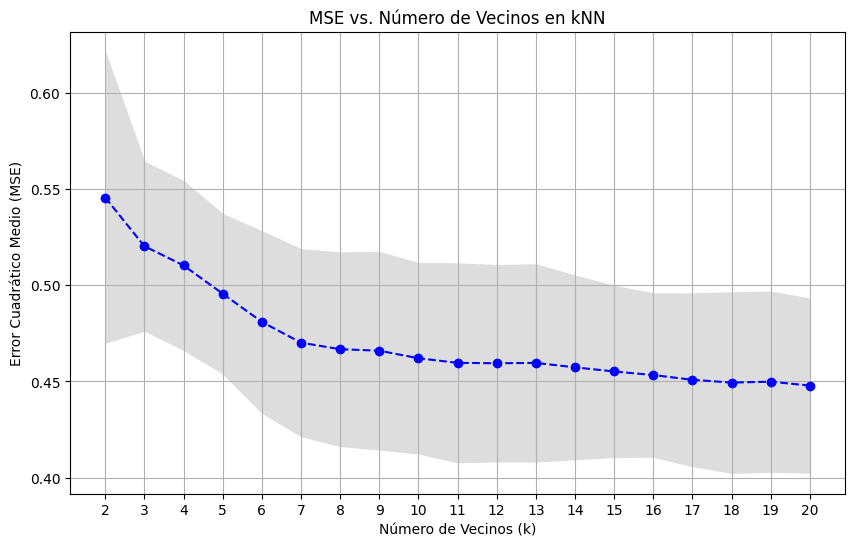

In [14]:
# Graficar MSE vs. k
plt.figure(figsize=(10, 6))
plt.plot(k_values, mse_mean, marker='o', linestyle='dashed', color='b')

# Dibujamos la banda de la desviación típica
lower_limit = np.array(mse_mean) - np.array(mse_std)
upper_limit = np.array(mse_mean) + np.array(mse_std)
plt.fill_between(k_values, lower_limit, upper_limit, color="#DDDDDD")

plt.xlabel("Número de Vecinos (k)")
plt.ylabel("Error Cuadrático Medio (MSE)")
plt.title("MSE vs. Número de Vecinos en kNN")
plt.xticks(k_values)
plt.grid()
plt.show()

## 5) Redes neuronales: Entrenamiento y selección

Crea dos redes neuronales de tipo Perceptrón Multicapa:
- La primera con una capa oculta de 250 neuronas
- La segunda con varias capas ocultas entre las que debes distribuir 250 neuronas, como te parezca

Asegúrate de que no salen warnings durante el entrenamiento indicando que no se ha alcanzado la convergencia durante el entrenamiento (para arreglarlo basta con poner un número de max_iter suficientemente grande).

En la configuración del perceptrón debes usar validación cruzada y explorar varios valores para el parámetro `alpha` que controla el coeficiente de regularización L2.

Para elegir el valor adecuado de dicho coeficiente pinta la curva de aprendizaje para cada perceptrón. En la curva debes pintar una línea que represente el error medio de las distintas particiones de validación y un área sombreada que represente la desviación típica.

Una vez tengas la curva de aprendizaje:
  - Identifica las diferencias de comportamiento entre ambos perceptrones, razona o especula sobre por qué se dan. ¿Hay alguno que domine al otro? ¿Es el comportamiento de uno más volátil que el del otro?
  - Determina de manera razonada con qué perceptrón te quedas y el valor óptimo del parámetro de regularización.

In [15]:
from sklearn.neural_network import MLPRegressor,MLPClassifier
RANDOM_STATE=333
mse_mean = []
mse_std = []


# Definimos un rango de valores para el parámetro de regularización (alpha)
regul_param_range = np.arange(0.1, 2.1, step=0.2) 
for regul_param in regul_param_range:
    # Creamos un modelo de red neuronal con una capa oculta de 250 neuronas
    # y el parámetro de regularización configurado con el valor actual
    mlp = MLPClassifier(hidden_layer_sizes=(250, ), alpha=regul_param, batch_size=100,
             learning_rate_init=0.001, max_iter=5000, random_state=RANDOM_STATE)
    # Evaluamos el modelo usando validación cruzada con 5 particiones (cv=5)
    scores =  cross_validate(mlp, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    mse_mean.append(np.mean(scores['test_score']))
    mse_std.append(np.std(scores['test_score']))

mse_mean

[np.float64(-0.5120404411764705),
 np.float64(-0.4862408088235294),
 np.float64(-0.4823314950980392),
 np.float64(-0.4870067401960784),
 np.float64(-0.4776194852941177),
 np.float64(-0.4846507352941177),
 np.float64(-0.48778186274509805),
 np.float64(-0.494031862745098),
 np.float64(-0.5034160539215686),
 np.float64(-0.504984681372549)]

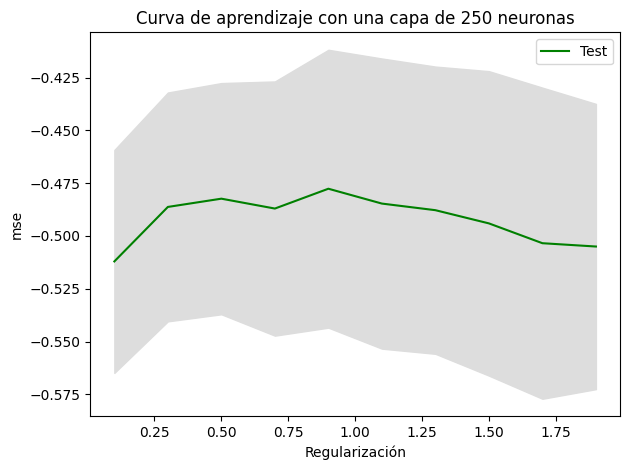

In [18]:
# Dibujamos la línea de la exactitud media en las partes de test
plt.plot(regul_param_range, mse_mean, color="g", label="Test")

# Dibujamos la banda de la desviación típica
lower_limit = np.array(mse_mean) - np.array(mse_std)
upper_limit = np.array(mse_mean) + np.array(mse_std)
plt.fill_between(regul_param_range, lower_limit, upper_limit, color="#DDDDDD")

# Creamos el gráfico
plt.title("Curva de aprendizaje con una capa de 250 neuronas")
plt.xlabel("Regularización"), plt.ylabel("mse"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

Observamos la curva de aprendizaje del perceptrón con una única capa de 250 neuronas. Esta representa el error cuadrático medio cometido en función del parámetro _alpha_ y vemos que el mejor valor para este parámetro es **_alpha_ = 0.9**. En este valor, tenemos un error cuadrático medio de 0.48 (en valor absoluto) y una desviación típica de 0.08 aproximadamente. Tomando la raíz cuadrada de este valor tendríamos el error promedio en unidades originales, que es de 0.68. Es decir, en promedio, las predicciones del modelo están a ±0.68 puntos de la calificación real. Esto es un buen valor de predicción y se puede considerar un buen aprendizaje.

Para el resto de valores de _alpha_, no hay mucho cambio en cuanto al aprendizaje, más o menos todos tienen el mismo mse. Aún así, cabe destacar que este aprendizaje crece rápidamente al principio, según aumentamos _alpha_, hasta que alcanza el máximo en 0.9 y ahí empieza a decrecer lentamente según avanzamos hacia la derecha en la gráfica.


In [17]:
mse_mean2 = []
mse_std2 = []


# Entrenar y validar distintas configuraciones
for regul_param in regul_param_range:
    # Aumentamos el parámetro max_iter hasta que converja
    mlp2 = MLPClassifier(hidden_layer_sizes=(125,75,50 ), alpha=regul_param, batch_size=100,
             learning_rate_init=0.001, max_iter=5000, random_state=RANDOM_STATE)

    scores2 =  cross_validate(mlp2, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    mse_mean2.append(np.mean(scores2['test_score']))
    mse_std2.append(np.std(scores2['test_score']))

mse_mean2

[np.float64(-0.6152389705882353),
 np.float64(-0.5191023284313726),
 np.float64(-0.5151991421568628),
 np.float64(-0.49016237745098035),
 np.float64(-0.4839093137254902),
 np.float64(-0.47917892156862746),
 np.float64(-0.4854350490196079),
 np.float64(-0.4932414215686275),
 np.float64(-0.49480698529411765),
 np.float64(-0.5010631127450981)]

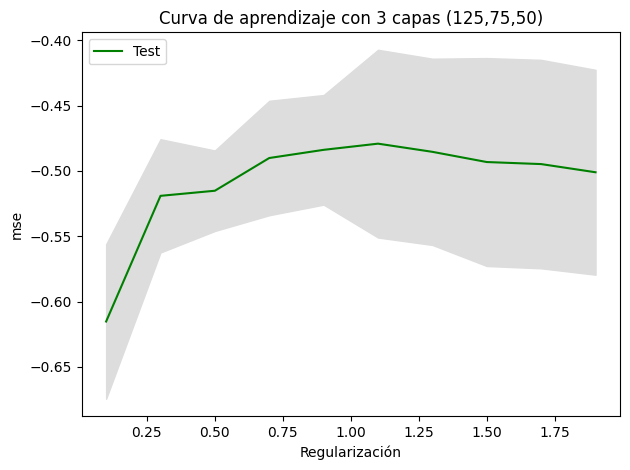

In [19]:
# Dibujamos la línea de la exactitud media en las partes de test
plt.plot(regul_param_range, mse_mean2, color="g", label="Test")

# Dibujamos la banda de la desviación típica
lower_limit2 = np.array(mse_mean2) - np.array(mse_std2)
upper_limit2 = np.array(mse_mean2) + np.array(mse_std2)
plt.fill_between(regul_param_range, lower_limit2, upper_limit2, color="#DDDDDD")

# Creamos el gráfico
plt.title("Curva de aprendizaje con 3 capas (125,75,50)")
plt.xlabel("Regularización"), plt.ylabel("mse"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

Esta curva de aprendizaje (del perceptrón multicapa con 3 capas de 125, 75 y 50 neuronas respectivamente) sale bastante distinta a la del anterior modelo. Observamos que en los valores bajos del parámetro _alpha_ se comete un error cuadrático medio alto. Este aumenta drásticamente según agrandamos el parámetro.

El mejor valor de error cuadrático medio se alcanza con _alpha_ = 1.1 , con un error absoluto de 0.47 aproximadamente. No obstante, hemos visto que tiene una alta desviación típica, de unos 0.08 puntos. Por eso, hemos decidido que el mejor valor para _alpha_ sea **_alpha_ = 0.9**, ya que tiene un error absoluto prácticamente igual, de unos 0.48, pero su desviación estándar es considerablemente menor (0.03 aproximadamente). Es decir, queremos un predictor que no cometa grandes errores y que, además, sea consistente con sus predicciones. No nos vale que a veces se aproxime mucho al resultado real pero que otras falle por bastante diferencia. 

### Comparación entre ambos tipos de Perceptrón

In [1]:
plt.figure(figsize=(8, 5))  # Definir tamaño de la figura

# Graficamos la curva de aprendizaje para la red de 1 capa (250 neuronas)
plt.plot(regul_param_range, mse_mean_1c, marker='o', linestyle='-', label="1 capa (250)")

# Graficamos la curva de aprendizaje para la red de 3 capas (125, 75, 50 neuronas)
plt.plot(regul_param_range, mse_mean_3c, marker='s', linestyle='--', label="3 capas (125, 75, 50)")

# Configuración del gráfico
plt.title("Curva de aprendizaje - Comparación de arquitecturas")
plt.xlabel("Regularización")
plt.ylabel("MSE")
plt.legend(loc="best")  # Agregar la leyenda
plt.grid(True)  # Agregar cuadrícula para mejor visualización
plt.tight_layout()
plt.show()

NameError: name 'plt' is not defined

Primero, notamos que ambos modelos tienen las mismas neuronas en total (250), pero distinta arquitectura interna:
- **Primer modelo (una capa con 250 neuronas)**: este modelo tiende a captar patrones generales entre los datos. Hemos observado que tarda menos que el otro, porque la información solo pasa por una capa antes de la salida.
- **Segundo modelo (3 capas con 250 neuronas en total)**: al tener varias capas, este tiene más capacidad de aprender y sacar relaciones complejas. En algunos casos, puede ser mejor opción, pues distribuye la carga de aprendizaje en varias capas.

Al ver que en ambas curvas de aprendizaje no hay tantas diferencias, concluimos que **no hay uno que domine a otro**. Esto se puede deber a que la complejidad de los datos a analizar no es muy elevada. Es decir, la arquitectura con una capa era suficiente para capturar las relaciones entre los datos de entrada. 

Si tuviésemos ante nosotros un problema más complejo, probablemente notaríamos diferencias entre los dos modelos, destacando el perceptrón de 3 capas. Este tiene mayor potencial para capturar relaciones profundas entre los datos. Pero, al ser un problema pequeño, no notamos apenas diferencias entre ambos, más allá de una menor desviación típica en el de 3 capas.

Como conclusión, ambos modelos serían válidos con un parámetro de **_alpha_ = 0.9** y no existiría gran diferencia entre ambos. Esto se debe a la baja complejidad de los datos de entrada. Aún así, decidimos optar por el **perceptrón con 3 capas**, debido a que tiene una menor desviación típica (0.03 frente a los 0.08 del otro modelo).

## 6) Medición y análisis del error

Elige la mejor configuración del apartado anterior y usa la función `cross_val_predict` para realizar una predicción de la calidad de todos los vinos usando validación cruzada.

A continuación:
- Muestra varias medidas de error y razona sobre si el error te parece pequeño o no para el problema que estás analizando
- Muestra el histograma de la distribución del error o del error en valor absoluto, y razona de nuevo si te parece que el modelo ha predicho bien o no. Identifica los vinos para los cuales el modelo ha fallado más.
- Analiza el error cometido para los vinos según su puntuación de calidad observada (3, 4, etc). Describe lo que sucede, explica por qué crees que sucedió y razona de nuevo si te parece que el modelo funciona bien o tiene limitaciones.
- Compara los resultados obtenidos (al menos MSE) con el mejor modelo de kNN.

In [20]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_absolute_error, r2_score

### Medidas de error

In [21]:
mlp_best = MLPClassifier(hidden_layer_sizes=(125,75,50 ), alpha=0.9, batch_size=100,
                         learning_rate_init=0.001, max_iter=5000, random_state=RANDOM_STATE)

# Realizamos las predicciones con validación cruzada
predicciones = cross_val_predict(mlp_best, X_train, y_train, cv=5)

# Cálculo de métricas de error
mse = mean_squared_error(y_train, predicciones)
mae = mean_absolute_error(y_train, predicciones)
#r2 = r2_score(y_train, predicciones)

# Imprimir métricas
print(f"Error cuadrático medio (MSE): {mse}")
print(f"Error absoluto medio (MAE): {mae}")

Error cuadrático medio (MSE): 0.4839718530101642
Error absoluto medio (MAE): 0.4104769351055512


Obtenemos un **error cuadrático medio** de 0.48 y un **error absoluto medio** de 0.41. Este error es pequeño para el problema que estamos analizando, pues estamos prediciendo calificaciones enteras de vinos. Es decir, esto nos indica que, en promedio, el predictor no se suele equivocar y, si se equivoca, muy probablemente lo haga por 1 punto de diferencia. Algo bastante aceptable considerando que la salida se mueve en una escala del 1 al 10.


### Distribución del error

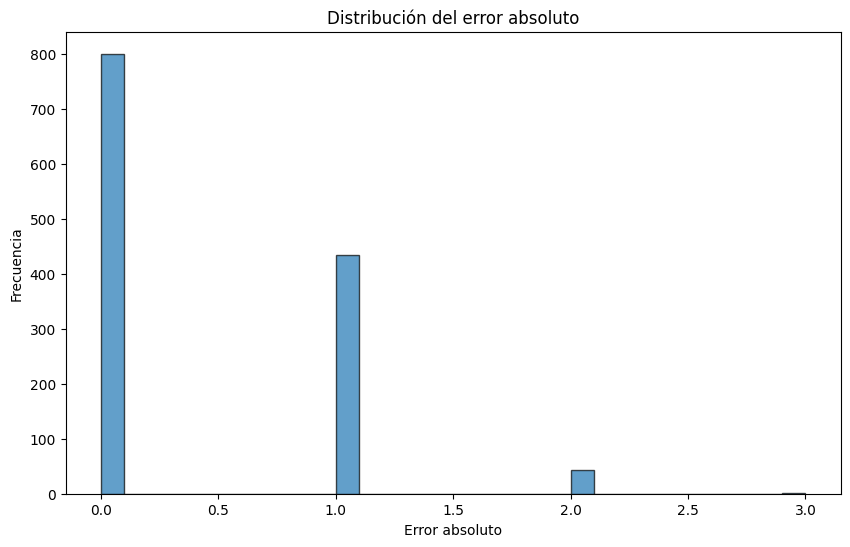

In [22]:
# Cálculo del error absoluto
error_abs = np.abs(predicciones - y_train)

# Graficar histograma del error absoluto
plt.figure(figsize=(10, 6))
plt.hist(error_abs, bins=30, edgecolor='k', alpha=0.7)
plt.title("Distribución del error absoluto")
plt.xlabel("Error absoluto")
plt.ylabel("Frecuencia")
plt.show()


En esta gráfica vemos que la predicción acierta (error=0) la mayoría de las veces, unas 800 de 1300.

In [39]:
# Identificar los vinos con mayor error
error_abs_sorted = np.argsort(error_abs)[::-1]  # Índices de los errores más grandes

# Mostrar los índices de los vinos con mayor error
top_error_indices = error_abs_sorted[:10]  # Top 10 con mayor error

# Mostrar los vinos con mayor error
print("Vinos con mayor error:")
for idx in top_error_indices:
    # Acceder al valor real de y_train usando .iloc para las posiciones
    vino_real = y_train.iloc[idx] 
    vino_pred = predicciones[idx] 
    
    # Imprimir el resultado
    print(f"Índice: {idx}, Predicción: {vino_pred}, Valor real: {vino_real}, Error absoluto: {np.abs(vino_pred-vino_real)}")


Vinos con mayor error:
Índice: 505, Predicción: 6, Valor real: 3, Error absoluto: 3
Índice: 711, Predicción: 7, Valor real: 5, Error absoluto: 2
Índice: 707, Predicción: 6, Valor real: 8, Error absoluto: 2
Índice: 705, Predicción: 5, Valor real: 7, Error absoluto: 2
Índice: 795, Predicción: 6, Valor real: 8, Error absoluto: 2
Índice: 852, Predicción: 6, Valor real: 4, Error absoluto: 2
Índice: 874, Predicción: 6, Valor real: 4, Error absoluto: 2
Índice: 672, Predicción: 6, Valor real: 8, Error absoluto: 2
Índice: 646, Predicción: 5, Valor real: 7, Error absoluto: 2
Índice: 898, Predicción: 6, Valor real: 4, Error absoluto: 2


Error medio por calificación real:
Calificación Real
3    2.111111
4    1.348837
5    0.243194
6    0.361660
7    0.694268
8    1.692308
Name: Error Absoluto, dtype: float64


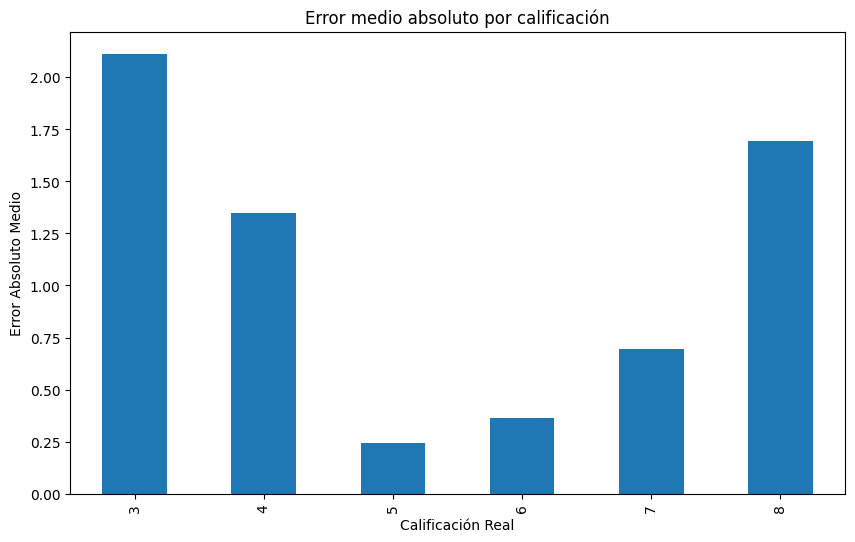

In [40]:
# Añadir el error absoluto al DataFrame para facilitar el análisis
df_errors = pd.DataFrame({
    'Calificación Real': y_train,
    'Error Absoluto': error_abs
})

# Agrupar por la calificación real y calcular el error medio para cada calificación
error_por_calificacion = df_errors.groupby('Calificación Real')['Error Absoluto'].mean()

print("Error medio por calificación real:")
print(error_por_calificacion)

# Graficar el error medio por cada calificación
error_por_calificacion.plot(kind='bar', figsize=(10, 6))
plt.title("Error medio absoluto por calificación")
plt.xlabel("Calificación Real")
plt.ylabel("Error Absoluto Medio")
plt.show()


Se puede observar que cuanto más extrema es la calificación, más acusado es el error cometido por el predictor. Aún así, hay que tener en cuenta que la gran minoría de los datos tienen estas calificaciones extremas. Es decir, el predictor se ha entrenado con vinos con calificaciones de 5 o 6 (en general), así que cuando le toca predecir uno que descuadra mucho de esta media, falla. 

Como la mayoría de vinos están entre 5 o 6, el error cometido en estas es muy bajo (de 0.3 aprox). En cambio, en el resto de notas el error supera la unidad. La calificación con más error es la 3, pues existen pocos vinos con esta y es muy probable que el predictor no haya aprendido a distinguir los patrones que hacen que un vino obtenga esta marca. El error en esta supera los 2 puntos, por lo que se puede intuir que les asigna la calificación de 5.

En resumen, por el gráfico vemos que la mayoría de las notas que asigna el predictor son 5 o 6, ya que estas son las notas promedio de los vinos en nuestra base de datos. Por tanto, el predictor hace buen trabajo en promedio, pero en los datos extremos se equivoca bastante. Si quisiésemos arreglarlo, necesitaríamos introducir más vinos con estas puntuaciones extremas, para que fuese capaz de ver los patrones que hacen que las obtengan.